In [1]:
# image processing
from PIL import Image
from io import BytesIO
import webcolors
from dataloader import load_data

# data analysis
import math
import numpy as np
import pandas as pd
import os
import timeit
import glob

# visualization
import matplotlib.pyplot as plt
from importlib import reload
from mpl_toolkits import mplot3d
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
plt.style.use("ggplot")
from skimage import io
from skimage.io import imread_collection
from PIL import Image

# modeling
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
data = load_data("img/yawning_dog.jpg")
#data = Image.open("img/yawning_dog.jpg")
#dog_labels = plt.axes(xticks=[],yticks=[])
#dog_labels.imshow(data);
#np.shape(data)
data

array([[83, 88, 34],
       [84, 87, 34],
       [85, 88, 35],
       ...,
       [97, 42, 12],
       [94, 39,  8],
       [91, 38,  4]], dtype=uint8)

In [3]:
gmm = GaussianMixture(n_components = 11, random_state = 0).fit(data)

In [4]:
gmm.means_

array([[124.44770231, 105.10919206,  79.29437575],
       [ 60.38853689,  35.02263681,  15.91794436],
       [134.8622154 , 130.3995822 , 112.76694888],
       [128.16850763,  76.5548441 ,  30.01583028],
       [184.20298669, 132.86763419,  79.55304374],
       [ 15.37290974,  11.1679262 ,   5.77725298],
       [206.68710576, 195.27871648, 172.93697773],
       [227.03286797, 174.68643941, 119.67403852],
       [132.18230853, 149.87279951,  73.00926309],
       [115.76441253,  35.16481086,  27.28437698],
       [144.39902723, 113.47021602,  71.28687314]])

In [5]:
gmm.precisions_

array([[[ 0.00622671, -0.00500877, -0.0021744 ],
        [-0.00500877,  0.00645318, -0.00045516],
        [-0.0021744 , -0.00045516,  0.00346606]],

       [[ 0.01305666, -0.03128345,  0.01749386],
        [-0.03128345,  0.08583143, -0.04780761],
        [ 0.01749386, -0.04780761,  0.03511294]],

       [[ 0.032267  , -0.04509304,  0.01291129],
        [-0.04509304,  0.06849941, -0.02456721],
        [ 0.01291129, -0.02456721,  0.01412703]],

       [[ 0.00719211, -0.01008113,  0.0050262 ],
        [-0.01008113,  0.03246951, -0.03121891],
        [ 0.0050262 , -0.03121891,  0.03970618]],

       [[ 0.0158139 , -0.02503887,  0.00966797],
        [-0.02503887,  0.06181293, -0.03260658],
        [ 0.00966797, -0.03260658,  0.02065696]],

       [[ 0.0606854 , -0.0960004 ,  0.04978196],
        [-0.0960004 ,  0.29249307, -0.23646947],
        [ 0.04978196, -0.23646947,  0.29035346]],

       [[ 0.02560284, -0.04841023,  0.02340476],
        [-0.04841023,  0.11186196, -0.06184759],
        

In [6]:
for i in range(len(data)):
    predicted = gmm.predict([data[i]])
    data[i] = gmm.means_[predicted]
    #data[i] = gmm.predict([data[i]])
    # print(predicted)
    # print(data[i])


In [7]:
print(data[i])

[128  76  30]


In [8]:
data.shape

(1410000, 3)

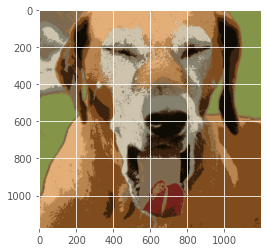

In [9]:
gmm_img = np.reshape(data,(1175, 1200, 3))
plt.imshow(gmm_img) 